**ASSIGNMENT 2 : ADULT SENSUS INCOME**

**PROBLEM CONTEXT**

The weights on the Current Population Survey (CPS) files are controlled to independent
estimates of the civilian noninstitutional population of the US. These are prepared monthly for us
by Population Division here at the Census Bureau. We use 3 sets of controls.

These are:

1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age, and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have
similar weights. There is one important caveat to remember this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within the state.

**TASK**

Predict whether income exceeds $50K/yr based on census data

**SUBTASKS**

* Give a detailed study about the dataset by doing a domain analysis. Max 15
lines. Eg : What are liver diseases and what are the features doctors use to predict?
*  Do basic research and find how to solve it analytically and with what techniques. Max 1 page of description about your technical approach
* Do some data cleaning and feature engineering
*  Do an Exploratory data analysis. Minimum 4 types of visualization must with explanation
*  Use supervised classification: logistic, KNN, Decision Tree and benchmark its accuracy
*  Do an evaluation process and predict its accuracy, precision, and recall
*  If possible try to deploy it on cloud

**DATASET LINK:** https://www.kaggle.com/uciml/adult-census-income

**OUTPUT:** Submit the output as Jupyter Notebook

---
**Domain Analysis**

The Adult Census Income dataset is derived from the U.S. Census Bureau’s Current Population Survey (CPS). The goal is to predict whether an individual’s annual income exceeds $50,000 based on demographic and socio-economic attributes. The dataset reflects weighted population estimates, where individuals with similar demographic characteristics share similar sampling weights within each state.

Income level is influenced by factors such as education, occupation, work experience, marital status, and hours worked per week. Key features include:

* **Age** – Income generally increases with experience up to a certain point.
* **Workclass** – Type of employment (Private, Government, Self-employed).
* **Education & Education-num** – Higher education levels strongly correlate with higher income.
* **Marital Status** – Married individuals often show higher combined earning potential.
* **Occupation** – Professional and managerial roles tend to earn more.
* **Relationship** – Family role (Husband, Wife, Not-in-family) influences earning patterns.
* **Race & Sex** – Socio-economic disparities may affect income distribution.
* **Capital Gain & Capital Loss** – Investment income significantly impacts total earnings.
* **Hours per week** – Higher working hours often correlate with higher income.
* **Native Country** – Geographic and immigration background may influence opportunities.

The target variable is binary: income ≤50K or >50K. The problem is a supervised classification task based on socio-economic predictors.

---

**Technical Approach**

The Adult Census Income problem is a supervised binary classification task where the objective is to predict whether an individual's annual income exceeds $50K. Since the target variable is categorical (>50K or ≤50K), classification algorithms are appropriate.

**1. Problem Understanding**

Income prediction is influenced by multiple socio-economic variables. Some features are categorical (Workclass, Education, Occupation, Marital Status), while others are numerical (Age, Hours-per-week, Capital Gain, Capital Loss). The dataset may also contain missing values represented as “?”.

**2. Analytical Approach**

Before applying machine learning models, the following analytical steps will be performed:

* Descriptive statistics to understand central tendency and spread of numerical features.
* Distribution analysis of income groups to check class imbalance.
* Correlation analysis between numerical features and income level.
* Study of categorical variable distributions across income classes.
* Identification of outliers (especially in Capital Gain/Loss).

These steps help understand patterns and relationships before modeling.

**3. Data Preprocessing Strategy**

To prepare the dataset:

* Replace “?” with NaN and handle missing values (drop or impute).
* Encode categorical variables using One-Hot Encoding.
* Normalize/standardize numerical features for distance-based models.
* Handle class imbalance if present (e.g., using stratified split).
* Split dataset into training and testing sets (80-20).

Feature engineering may include:

* Combining education levels into broader categories.
* Creating work-experience proxies using age.
* Binning hours-per-week into ranges.

**4. Machine Learning Models**

**Logistic Regression**

* Suitable baseline linear classifier.
* Provides interpretable coefficients showing impact of features on high income probability.

**K-Nearest Neighbors (KNN)**

* Classifies individuals based on similarity in socio-economic characteristics.
* Sensitive to scaling; requires normalized data.

**Decision Tree**

* Captures non-linear relationships.
* Can model interaction effects (e.g., education + occupation).
* Easy to interpret visually.

Each model will be trained and compared on test data.


**5. Evaluation Metrics**

Since income prediction involves class imbalance, accuracy alone is insufficient. The following metrics will be used:

* **Accuracy** – Overall correct predictions.
* **Precision** – Percentage of predicted high-income individuals who truly earn >50K.
* **Recall** – Percentage of actual high-income individuals correctly identified.
* **Confusion Matrix** – Detailed performance breakdown.

The best model will be selected based on balanced performance across accuracy, precision, and recall.

---

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download Dataset
import kagglehub
path = kagglehub.dataset_download("uciml/adult-census-income")

100%|██████████| 450k/450k [00:00<00:00, 1.14MB/s]

Extracting files...


In [3]:
#extract data set
adult_df=pd.read_csv(f"{path}/adult.csv")

In [4]:
# Quick Inspection: DataFrame's structure, column names, and initial data types
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# summary of a DataFrame
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Data cleaning, feature engineering and EDA**



In [7]:
# Which features are available in the dataset?
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
#Describe statistical information about NUMERICAL columns in dataset
adult_df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
#Check for any null values
adult_df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


adult census income greater than $50K/yr:  24720
adult census income not greater than $50K/yr:  7841


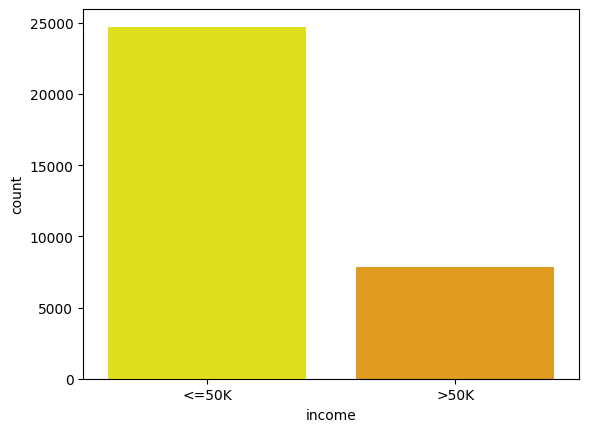

In [9]:
sns.countplot(data=adult_df, x = 'income', label='adult_df', palette=['yellow', 'orange'])

AG, NAG= adult_df['income'].value_counts()
print('adult census income greater than $50K/yr: ',AG)
print('adult census income not greater than $50K/yr: ',NAG)

In [11]:
adult_df.shape

(32561, 15)

In [12]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
cat_col = adult_df.dtypes[adult_df.dtypes == 'object']
num_col = adult_df.dtypes[adult_df.dtypes != 'object']

In [15]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adult_df[col].value_counts()
    percent = adult_df[col].value_counts() / adult_df.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
workclass                        
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
education                    
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Pres

In [16]:
edit_cols = ['native.country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'unknown'

In [17]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


In [18]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
adult_df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
adult_df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

adult_df['education'].value_counts()

,count
education,
HS-grad,13556
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
elementary_school,1147
Assoc-acdm,1067
Prof-school,576
Doctorate,413


In [19]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_df['marital.status'].value_counts()

,count
marital.status,
Married,15417
Never-married,10683
Separated,5468
Widowed,993


In [20]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_df['workclass'].value_counts()

,count
workclass,
Private,22696
Govt_employees,4351
Self_employed,3657
unknown,1836
Without-pay,14
Never-worked,7


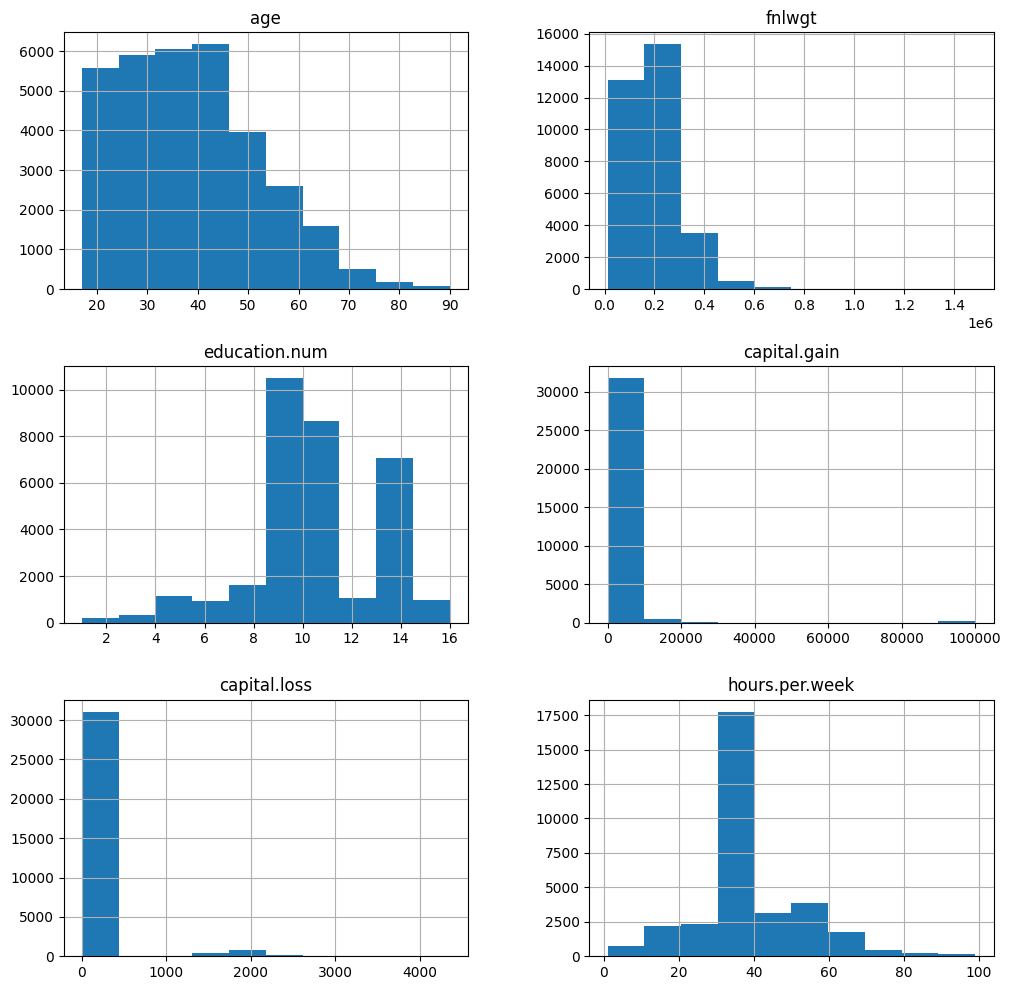

In [21]:
adult_df[list(num_col.index)].hist(figsize = (12,12));

In [22]:
capital_loss_df = adult_df[adult_df['capital.loss']>0]
capital_gain_df = adult_df[adult_df['capital.gain']>0]

print(f"Number of observations having capital loss above median value: {capital_loss_df.shape}\nNumber of observations in capital gain dataset above median value: {capital_gain_df.shape}")
print(f"Percentage of people having capital gain greater than median value: {(adult_df.loc[adult_df['capital.gain'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(adult_df.loc[adult_df['capital.loss'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")

Number of observations having capital loss above median value: (1519, 15)
Number of observations in capital gain dataset above median value: (2712, 15)
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.6651%


In [23]:
capital_gain_0= adult_df[adult_df['capital.loss'] > 0].loc[:,['capital.loss','capital.gain']].sample(10)

capital_loss_0 = adult_df[adult_df['capital.gain'] > 0].loc[:,['capital.loss','capital.gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())

      capital.loss  capital.gain
36            2559             0
950           1848             0
509           1977             0
1009          1741             0
1166          1669             0
      capital.loss  capital.gain
3507             0          3471
1934             0         15024
2236             0         10605
3069             0          5178
3793             0          2907


In [24]:
# Exploring Case when capital.gain and capital loss both are zero. As this category of people are more in our dataset.
print(f"Number of observations having capital gain and capital loss zero: {adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)].shape}")
for col in cat_col.index:
    print(f"================================{col}=================================")
    print(adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)][col].value_counts())

Number of observations having capital gain and capital loss zero: (28330, 15)
================================workclass=================================
workclass
Private           19982
Govt_employees     3714
Self_employed      2960
unknown            1655
Without-pay          12
Never-worked          7
Name: count, dtype: int64
================================education=================================
education
HS-grad              12246
Some-college          6533
Bachelors             4384
Masters               1300
Assoc-voc             1194
elementary_school     1049
Assoc-acdm             930
Prof-school            363
Doctorate              284
Preschool               47
Name: count, dtype: int64
================================marital.status=================================
marital.status
Married          12603
Never-married     9914
Separated         4934
Widowed            879
Name: count, dtype: int64
================================occupation===============================

In [25]:
adult_df.loc[adult_df['capital.gain'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


In [26]:
print(f"Number of observations having capital gain of 99999:{adult_df.loc[adult_df['capital.gain'] == 99999,:].shape}")
print(f"Income counts: {adult_df.loc[adult_df['capital.gain'] == 99999,:]['income'].value_counts()}")

Number of observations having capital gain of 99999:(159, 15)
Income counts: income
>50K    159
Name: count, dtype: int64


In [27]:
adult_df.loc[adult_df['capital.loss'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


In [28]:
print(f"Number of observations having capital loss of 4356:{adult_df.loc[adult_df['capital.loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{adult_df.loc[adult_df['capital.loss'] >= 1871,:]['income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
income
>50K     658
<=50K    277
Name: count, dtype: int64


**Exploratory Data Analysis (EDA)**

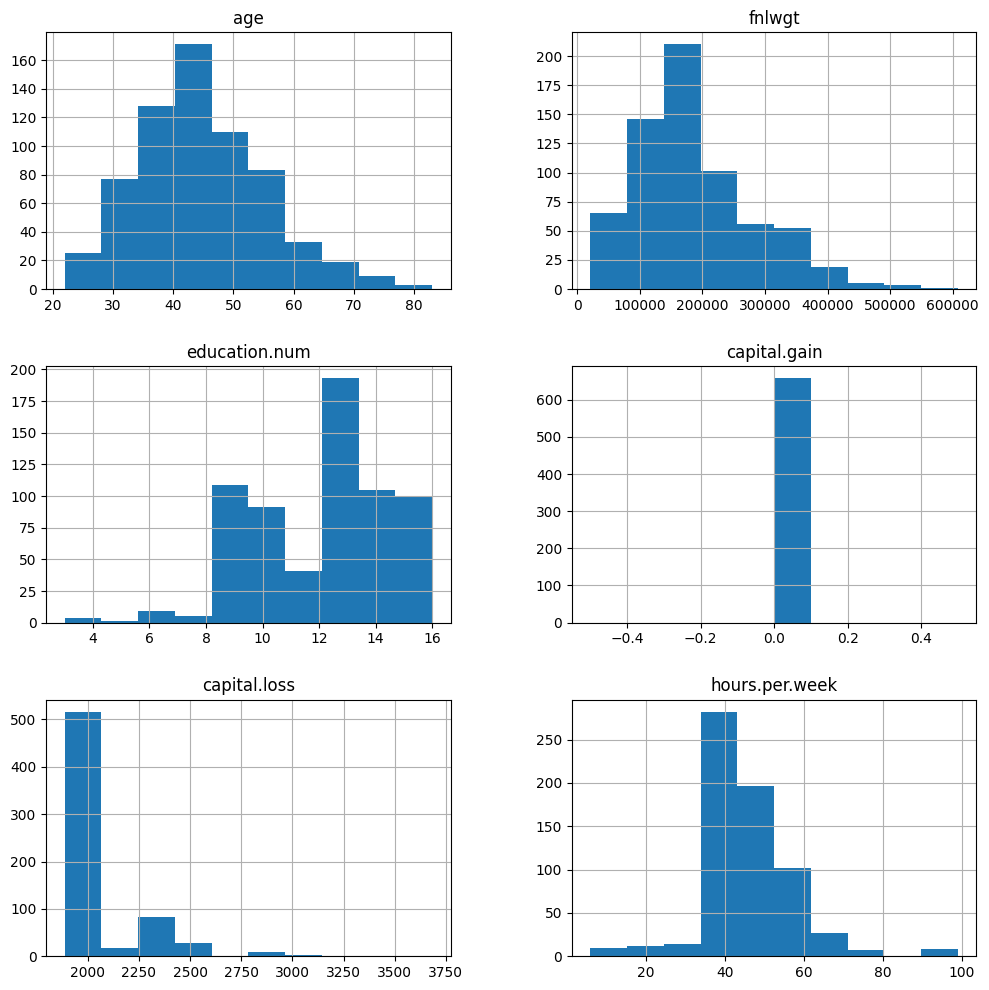

In [29]:
# let's understand characteristics of people having capital loss greater than mean value and having income greater than 50K
adult_df[(adult_df['capital.loss'] >= 1871) & (adult_df['income'] == '>50K')].hist(figsize = (12,12));



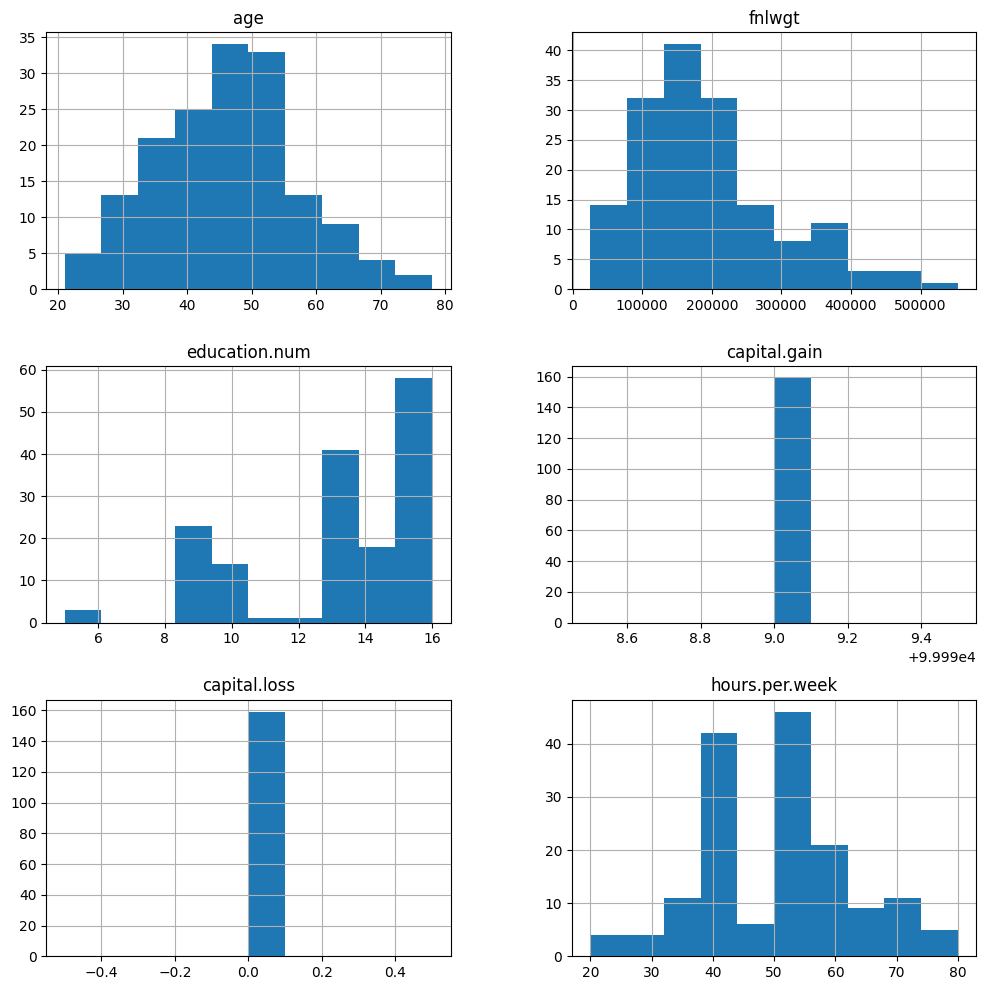

In [ ]:
adult_df.loc[adult_df['capital.gain'] == 99999,:].hist(figsize = (12,12));

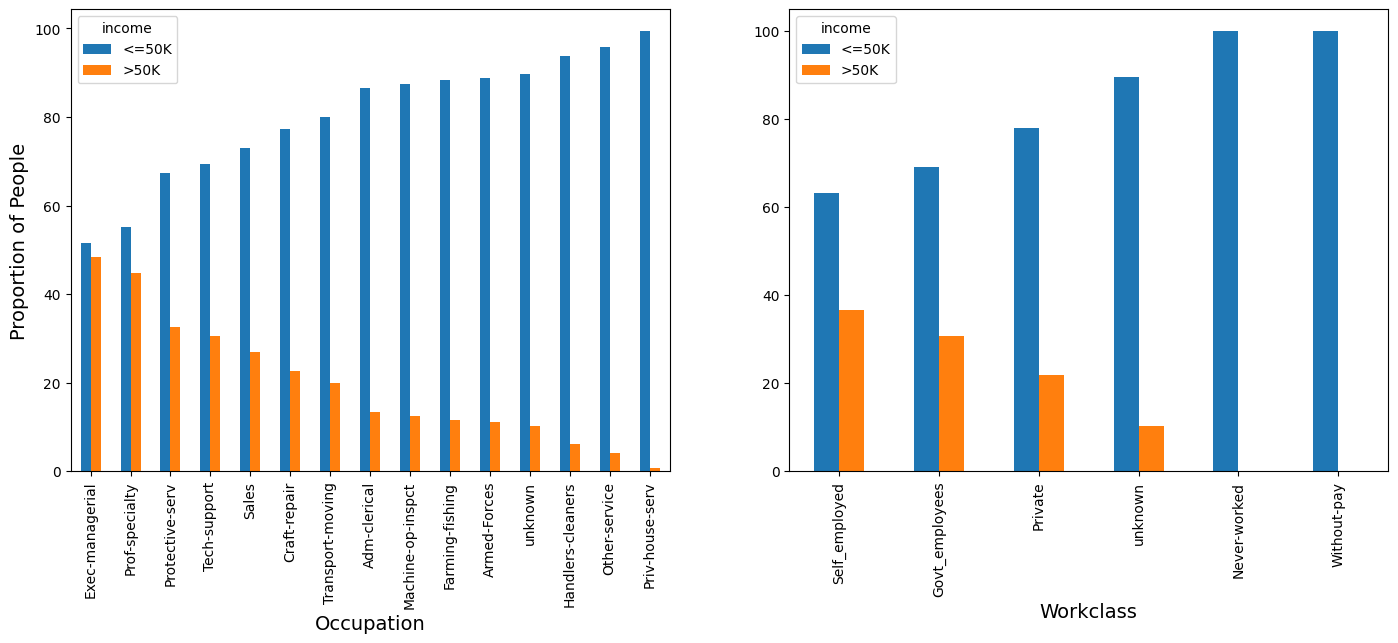

In [30]:
table_occu = pd.crosstab(adult_df['occupation'], adult_df['income'])
table_workclass = pd.crosstab(adult_df['workclass'], adult_df['income'])
table_edu = pd.crosstab(adult_df['education'], adult_df['income'])
table_marital = pd.crosstab(adult_df['marital.status'], adult_df['income'])
table_race = pd.crosstab(adult_df['race'], adult_df['income'])
table_sex = pd.crosstab(adult_df['sex'], adult_df['income'])
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);

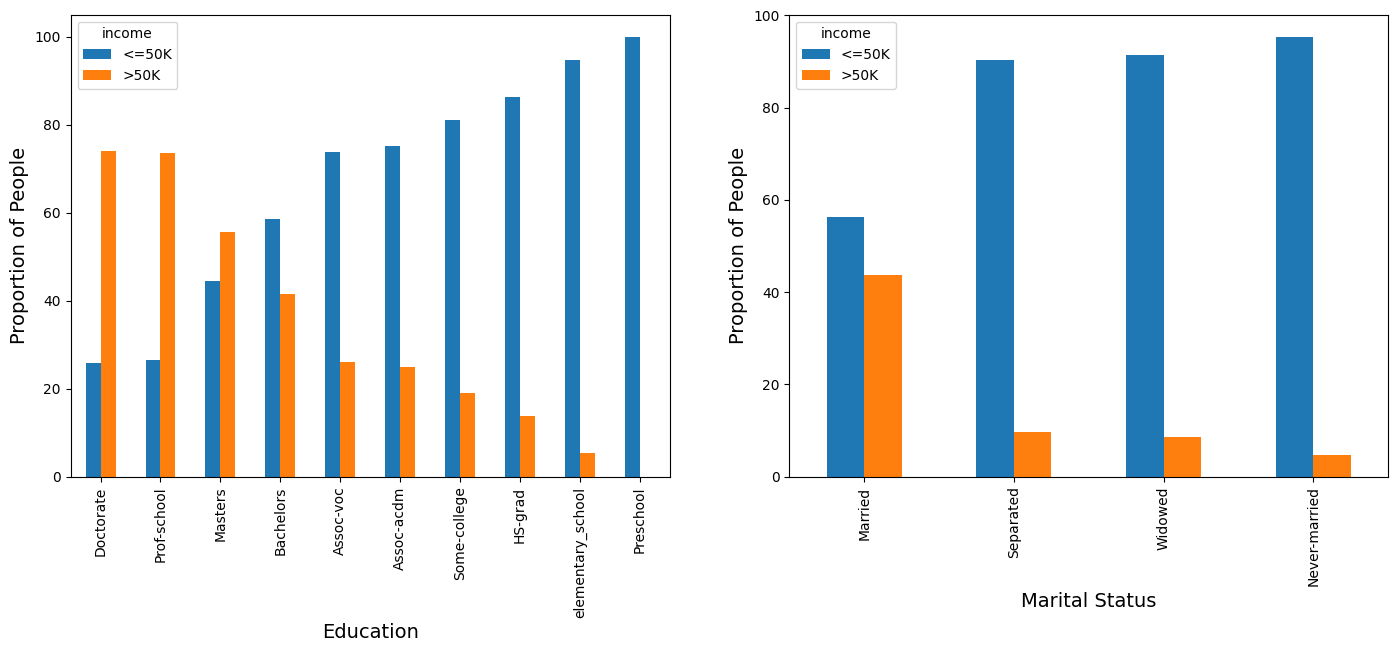

In [ ]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

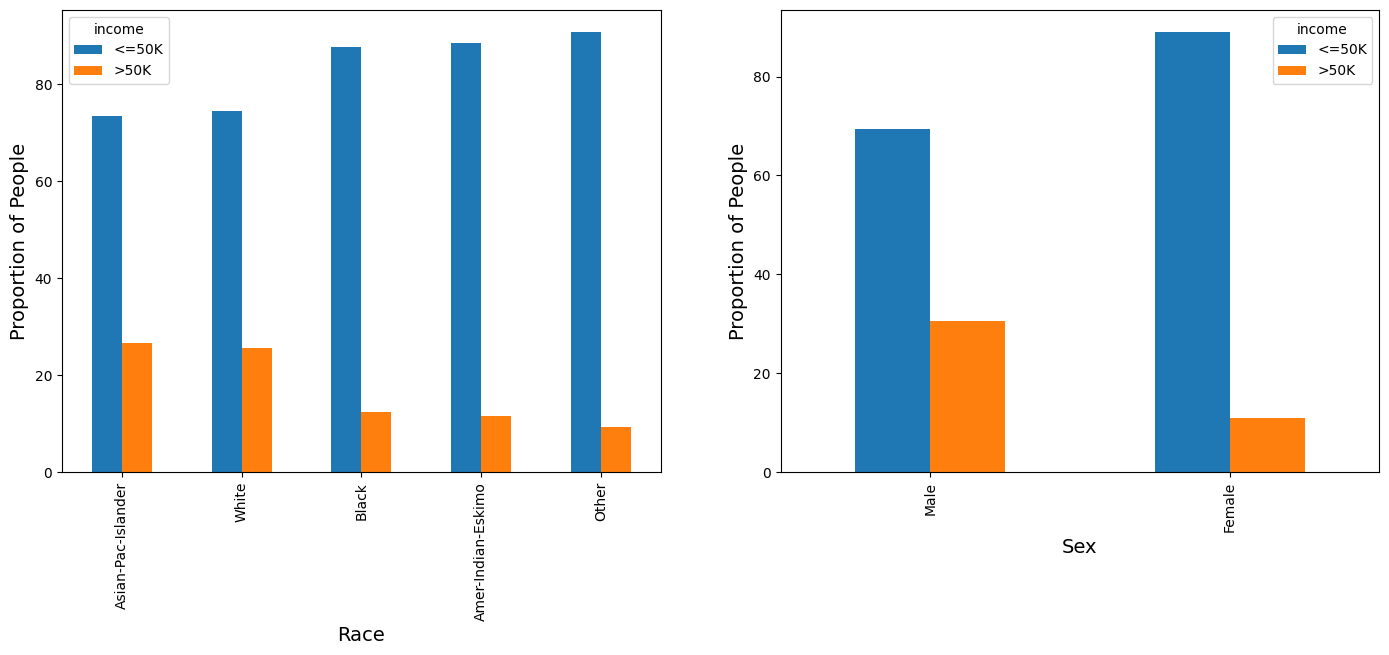

In [31]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);



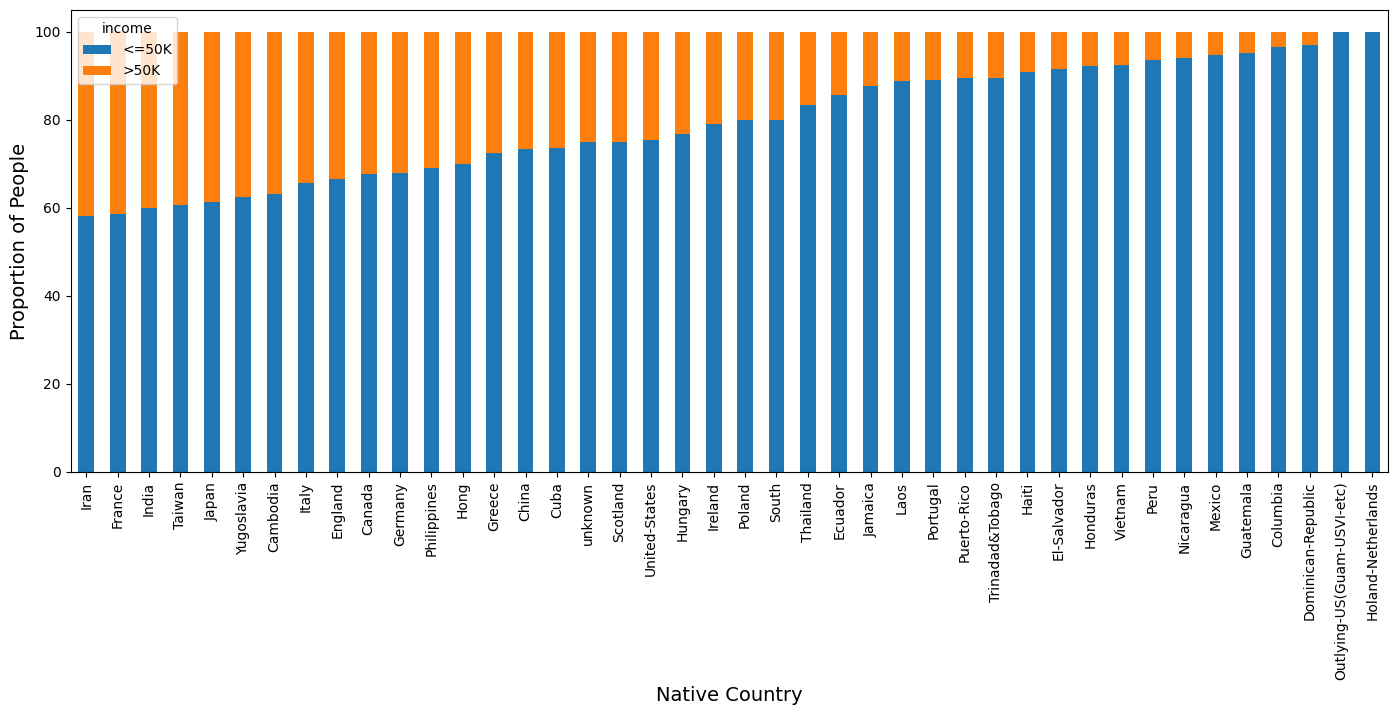

In [32]:
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);



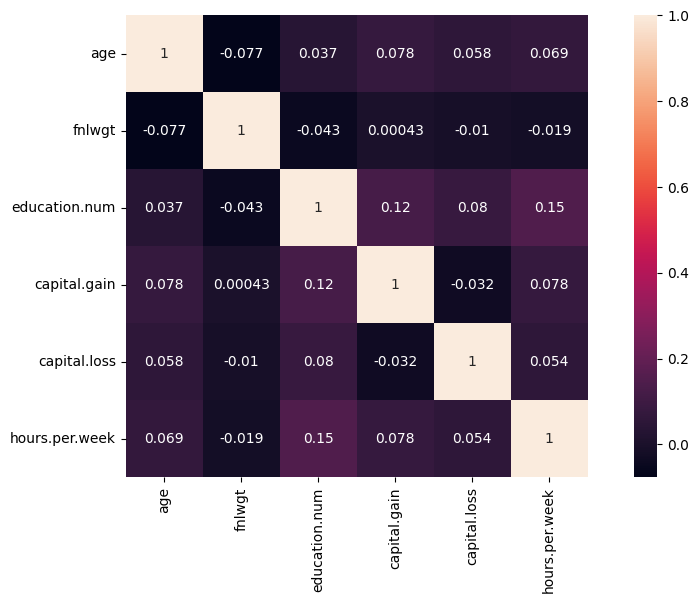

In [33]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(adult_df[list(num_col.index)].corr(),annot = True,square = True);



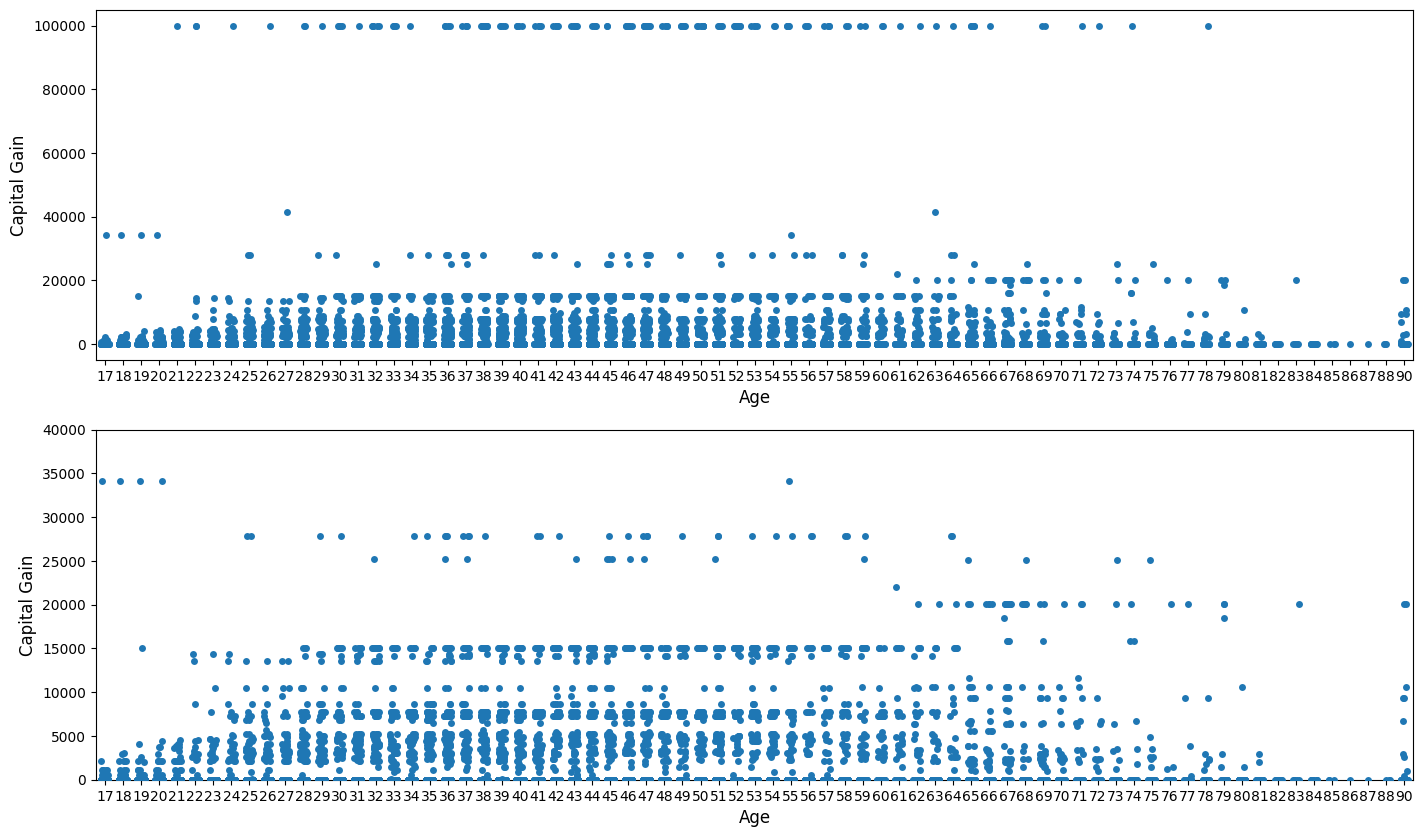

In [34]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot(x='age', y='capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot(x='age', y='capital.gain', data = adult_df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

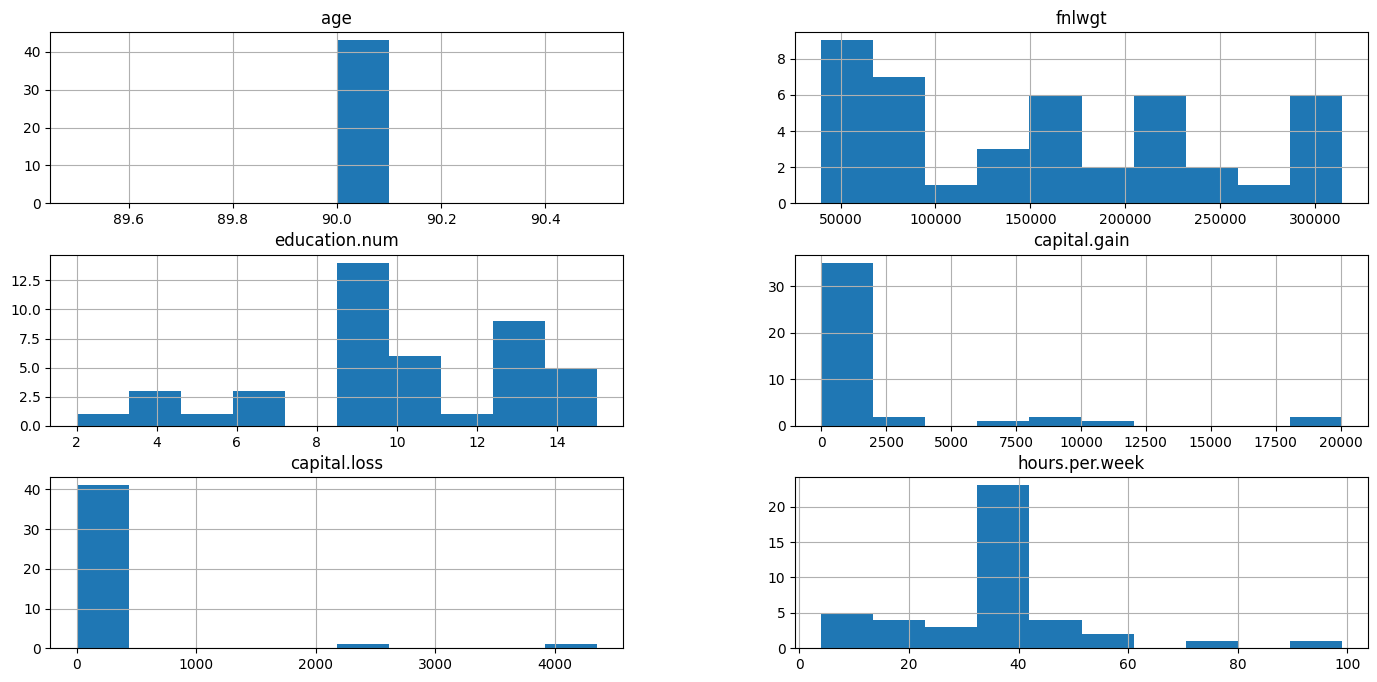

In [35]:
adult_df[adult_df['age'] == 90].hist(figsize = (17,8));

In [36]:
cols = ['workclass','occupation', 'income']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(adult_df[adult_df['age'] == 90][col].value_counts())
    else:
        continue

=======================================workclass=========================
workclass
Private           28
unknown            7
Govt_employees     5
Self_employed      3
Name: count, dtype: int64
=======================================occupation=========================
occupation
Exec-managerial      8
unknown              7
Other-service        6
Prof-specialty       5
Adm-clerical         4
Sales                3
Craft-repair         3
Machine-op-inspct    3
Protective-serv      1
Handlers-cleaners    1
Farming-fishing      1
Transport-moving     1
Name: count, dtype: int64
=======================================income=========================
income
<=50K    35
>50K      8
Name: count, dtype: int64


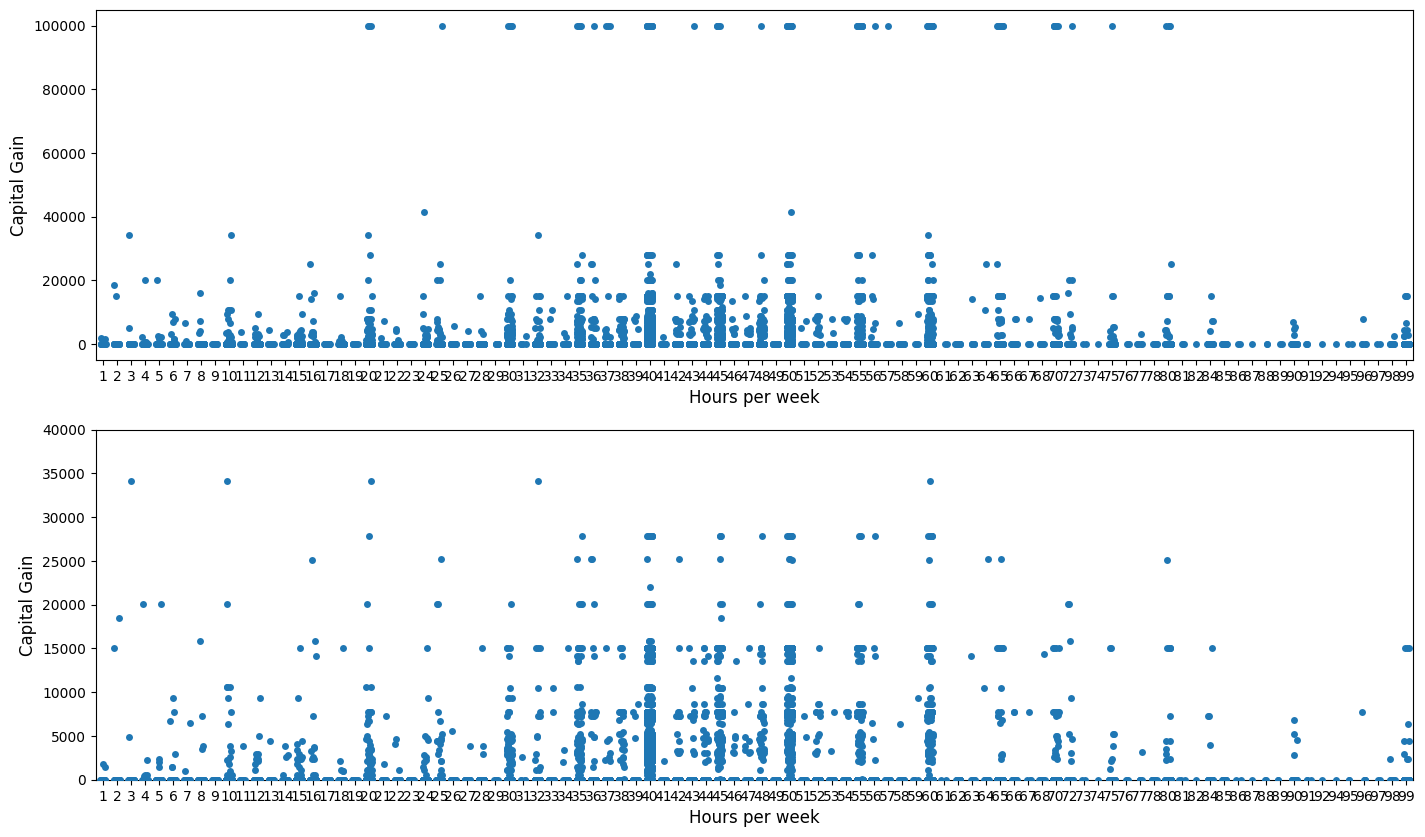

In [37]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot(x='hours.per.week', y='capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot(x='hours.per.week', y='capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

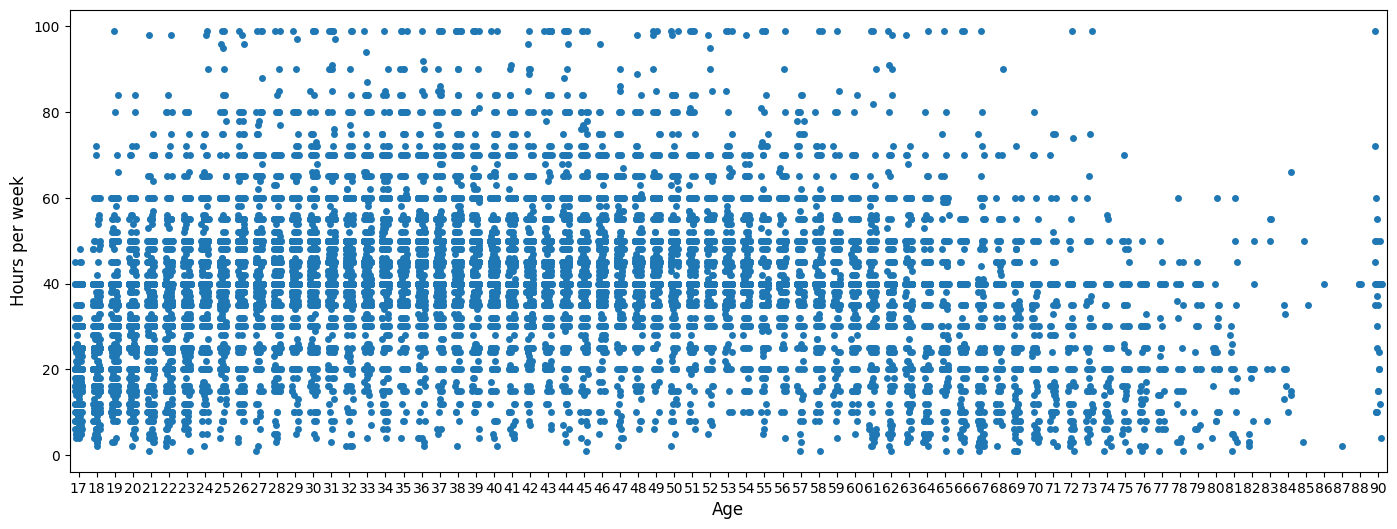

In [38]:
fig = plt.figure(figsize = (17,6))

sns.stripplot(x='age',y='hours.per.week', data = adult_df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Hours per week',fontsize = 12);

**Data cleaning and feature engineering**



In [39]:
print(f"Number of columns before deleting: {adult_df.shape[1]}")

del_cols = ['relationship','education.num']
adult_df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {adult_df.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 13


In [40]:
hrs_per_week = adult_df[adult_df['hours.per.week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])

Number of people working for 99 hours per week: 85


In [41]:
# drop rows with age 90
print("Number of observation before removing:",adult_df.shape)
index_age = adult_df[adult_df['age'] == 90].index
adult_df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)




Number of observation before removing: (32561, 13)
Number of observation after removing: (32518, 13)


In [42]:
print("Number of observation before removing:",adult_df.shape)
index_gain = adult_df[adult_df['capital.gain'] == 99999].index
adult_df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

Number of observation before removing: (32518, 13)
Number of observation after removing: (32359, 13)


In [43]:
num_col_new = ['age','capital.gain', 'capital.loss',
       'hours.per.week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital.status', 'occupation',
               'race', 'sex', 'native.country', 'income']

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(adult_df[num_col_new]),columns = num_col_new).head(3)

,age,capital.gain,capital.loss,hours.per.week,fnlwgt
0,0.915493,0.0,1.000000,0.173469,0.081896
1,0.690141,0.0,1.000000,0.397959,0.118021
2,0.521127,0.0,0.895317,0.397959,0.086982


In [45]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names

    def fit(self,X,y = None):
        return self

    def transform(self,X):
        return X[self.attribute_names]


class num_trans(TransformerMixin):
    def __init__(self):
        pass

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new
        return df



pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [46]:
num_df = pipeline.fit_transform(adult_df)
num_df.shape

(32359, 5)

In [47]:
# columns which I don't need after creating dummy variables dataframe
cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','income_>50K']

In [48]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols

    def fit(self,X,y = None):
        return self

    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)]
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(adult_df)
cat_df.shape

(32359, 80)

In [49]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [50]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")

Number of observations in final dataset: (32157, 86)


**Training Models and Evalution (along with accuracy, precision, and recall)**

In [51]:
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K'],axis = 1,inplace = True)
X = final_df

In [52]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from datetime import datetime

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc


In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [54]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()


In [55]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN']

In [56]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN'}

In [57]:
# train function fits the model and returns accuracy score
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))

def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores

accuracy_scores = main(models)

--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 84.2786%
Null Accuracy: 76.5050%
Confusion Matrix
[[1043  846]
 [ 418 5733]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 84.2786%
Recall Score: 93.2044%
Specificity Score: 55.2144%
False Positive Rate: 44.7856%
Precision Score: 87.1409%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       False       0.71      0.55      0.62      1889
        True       0.87      0.93      0.90      6151

    accuracy                           0.84      8040
   macro avg       0.79      0.74      0.76      8040
weighted avg       0.83      0.84      0.84      8040

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTr

In [58]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores
LogisticRegression,0.842786
KNN,0.810821
DecisionTree,0.799876


In [59]:
models_new = {clf_logreg:'LogisticRegression',
              clf_tree: 'DecisionTreeClassifier',
              clf_knn: 'KNeighborsClassifier'}

classifiers_new = models_new.values()

In [60]:
mean_score = []
for model,value in models_new.items():
    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    print(f"Time taken to complete training {value} model: (hh:mm:ss.ms) {elapsed_time}")
    mean_score.append(scores.mean())

Time taken to complete training LogisticRegression model: (hh:mm:ss.ms) 0:00:06.483639
Time taken to complete training DecisionTreeClassifier model: (hh:mm:ss.ms) 0:00:04.149822
Time taken to complete training KNeighborsClassifier model: (hh:mm:ss.ms) 0:00:15.451163


In [61]:
pd.DataFrame(mean_score,index = classifiers_new,
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)

,Accuracy Score
LogisticRegression,0.846125
KNeighborsClassifier,0.812124
DecisionTreeClassifier,0.795995
